In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2233, '28 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,28))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2
d['delta'] = d['high'].diff(1).fillna(0)

In [5]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.00000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.00620
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.00620
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.00130
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.00830
...,...,...,...,...,...,...,...,...,...,...
5171,2019-11-21,1.10723,1.10969,1.10521,1.10581,31829,1,0,1.107450,0.00156
5172,2019-11-22,1.10580,1.10875,1.10144,1.10182,32645,1,0,1.105095,-0.00094
5173,2019-11-25,1.10151,1.10320,1.10035,1.10126,27995,1,0,1.101775,-0.00555
5174,2019-11-26,1.10129,1.10255,1.10072,1.10194,28638,1,0,1.101635,-0.00065


<IPython.core.display.Javascript object>


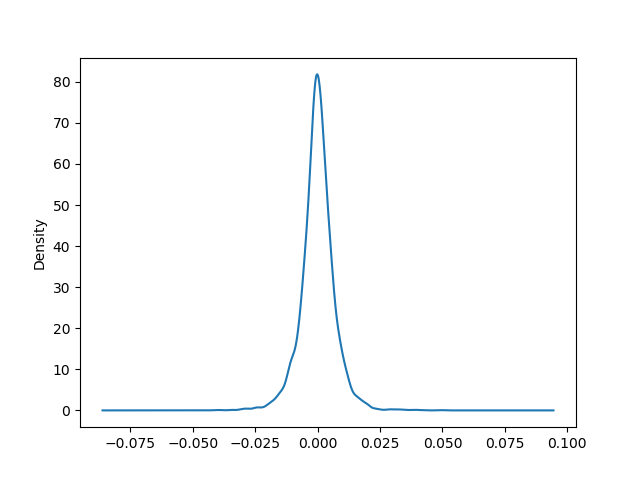

In [6]:
%matplotlib nbagg
d['delta'].plot.kde()

Мы получили распределение Коши. Дальше этот факт будет учитываться.

In [7]:
ln=d['delta'].values
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.00000,0.00620,0.00620,0.00130,-0.00830
1,0.00620,0.00620,0.00130,-0.00830,-0.00270
2,0.00620,0.00130,-0.00830,-0.00270,0.00360
3,0.00130,-0.00830,-0.00270,0.00360,0.00290
4,-0.00830,-0.00270,0.00360,0.00290,-0.00540
...,...,...,...,...,...
5167,0.00294,0.00332,-0.00061,-0.00025,0.00156
5168,0.00332,-0.00061,-0.00025,0.00156,-0.00094
5169,-0.00061,-0.00025,0.00156,-0.00094,-0.00555
5170,-0.00025,0.00156,-0.00094,-0.00555,-0.00065


In [8]:
from scipy.stats import spearmanr
coef, p = spearmanr(wn['d1'], wn['d2'])
print('кореляция ',coef)
print('p-value ',p)

кореляция  0.11172226388792181
p-value  7.756388462012735e-16


Определение параметров распределения.

In [9]:
from stats import *

In [10]:
model=cauchyvar(d['delta'])
with model:
    trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

Sequential sampling (1 chains in 1 job)
NUTS: [beta, alfa]
100%|█████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:17<00:00, 147.04it/s]
The acceptance probability does not match the target. It is 0.9258547258400193, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [11]:
print(pm.summary(trace))

          mean        sd  mc_error   hpd_2.5  hpd_97.5
alfa  0.000047  0.000065  0.000001 -0.000080  0.000177
beta  0.003160  0.000059  0.000002  0.003047  0.003274


<IPython.core.display.Javascript object>


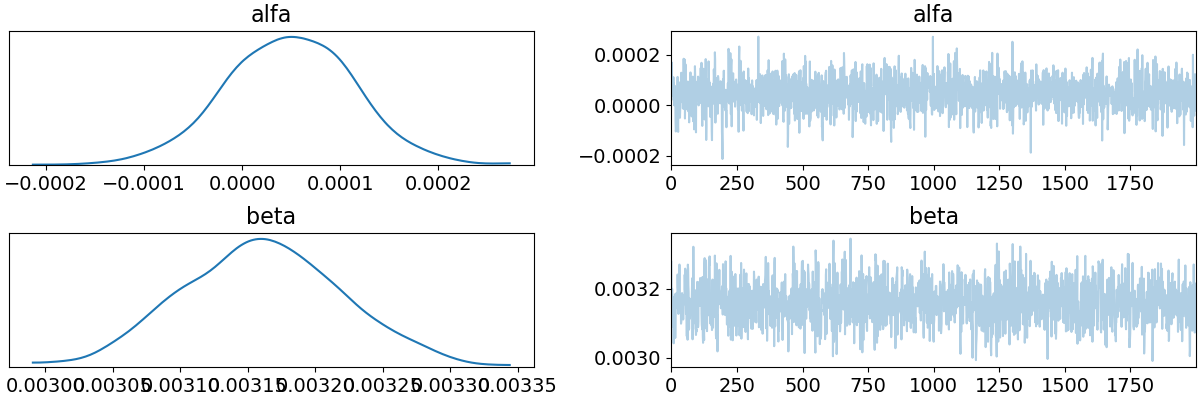

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B082FBAD48>,
      dtype=object)

In [12]:
pm.traceplot(trace)